# Machine Learning, HW 3

## Author: 314540003 / 卓康文 / Artem Mozol
##### Disclosure: partial assistance of Claude is involved.

## ✍️ Written assignment

### 1. Reading and Explaining Lemmas

Your task is to read the following paper:

Ryck et al., "On the approximation of functions by tanh neural networks"</br>

Focus on Lemma 3.1 and Lemma 3.2.

📌 What to Do<br>
Write a report that explains the statements and ideas behind these two lemmas.<br>
Your explanation should be written so that a college student who has completed Calculus I and II can understand.<br>
Avoid unnecessary technical jargon—your goal is to make the arguments accessible and clear.<br>

📌 Report Requirements<br>
Explain each lemma in your own words.<br>
Provide enough background/context so the results make sense.<br>
Use examples, diagrams, or intuitive explanations if helpful.<br>
Submit your report in a GitHub-readable format:<br>
Markdown (.md)<br>
PDF (.pdf)<br>

### 2. Unanswered Questions
There are unanswered questions from the lecture, and there are likely more questions we haven’t covered.

Take a moment to think about these questions.
Write down the ones you find important, confusing, or interesting.
You do not need to answer them—just state them clearly.

### 1. Reading and Explaining Lemmas
This report explains two fundamental results about how neural networks with hyperbolic tangent (tanh) activation functions can approximate polynomials.
The hyperbolic tangent function is defined as:
$$ tanh(x)=\frac{e^x+e^{−x}}{e^x−e^{−x}}$$
This is a smooth S-shaped activation function for the neural networks in our scope, that maps all real numbers to the interval (-1, 1).
The key question these lemmas explore is how to combine $tanh$ functions to approximate polynomial functions like $x^2$, $x^3$, $x^5$, etc., as well as their combinations.
<br>
#### Lemma 3.1: Approximating Odd-Degree Polynomials:

#### Notation Cheatsheet
| Symbol              |           Type | Meaning                               |
| ------------------- | -------------: | ------------------------------------- |
| $k$                 |             ℕ₀ | Order of derivative we care about     |
| $s$                 |    Odd integer | Maximum polynomial degree             |
| $M$                 |             ℝ⁺ | Bound on input domain [-M, M]         |
| $\epsilon$          |             ℝ⁺ | Desired approximation error           |
| $f_p(y)$            |       Function | The monomial $y^p$                    |
| $\Psi_{s,\epsilon}$ | Neural network | Network that approximates polynomials |
| $W^{k,\infty}$      |           Norm | Measures error including derivatives  |
| $\delta_h^p$        |       Operator | Finite difference operator            |
| $\sigma$            |       Function | The $tanh$ activation function          |
#### Main idea: 
given any odd-degree polynomial (like $x$, $x^3$, $x^5$, etc.) up to degree $s$, we can build a shallow neural network using tanh functions that approximates this polynomials to a desired degree of accuracy, even when measuring the error of the approximation, as well as its derivatives.
##### 1. The Finite Difference Trick
The concept of finite difference (a discrete version of derivatives) of the $tanh$ function is used. For a function $f$ and a small step $h$, the $p$-th order central difference is:

$$\delta_h^p[f](x) = \sum_{i=0}^p (-1)^i \binom{p}{i} f\left(x + \left(\frac{p}{2} - i\right)h\right)$$

This is would be equivalent to taking multiple evaluations of $f$ at nearby points and combining them after.
##### 2. Why This Works for Odd Powers

When applying the finite difference operator to $tanh$ and evaluating at $x=0$, odd-degree polynomials exhibit specific behavior:

- Most terms cancel out due to symmetry;
- What remains is proportional to $x^p$ when $p$ is odd;
- The proportionality constant involves the $p$-th derivative of $tanh$ at zero.

##### 3. The Approximation Formula

The neural network approximation for $y^p$ (when $p$ is odd) is:

$$\hat{f}_{p,h}(y) = \frac{\delta_h^p[\sigma](0)}{\sigma^{(p)}(0) \cdot h^p}$$

Here:
- The numerator evaluates $tanh$ at several points near $hy$;
- The denominator normalizes to get the right scaling;
- As $h \to 0$, this converges to $y^p$.

##### 4. Error Control

By choosing $h$ small enough, the approximation error can be made as small as desired. The error behaves like $O(h^2)$, meaning if $h$ is halved, the error would decrease by a factor of 4.

#### Network Architecture

The resulting neural network is "shallow" - it has only one hidden layer with $(s+1)/2$ neurons. Each neuron computes $\tanh(c \cdot y)$ for different constants $c$ related to the used finite difference points.


#### Lemma 3.2: Extending to Even-Degree Polynomials

#### Notation Cheatsheet

| Symbol | Type | Meaning |
|---|---:|---|
| $k$ | ℕ₀ | Order of derivative we care about |
| $s$ | Odd integer | Maximum polynomial degree |
| $M$ | ℝ⁺ | Bound on input domain [-M, M] |
| $\epsilon$ | ℝ⁺ | Desired approximation error |
| $\psi_{s,\epsilon}$ | Neural network | Network for all polynomials |
| $\alpha$ | ℝ⁺ | Shift parameter for recursion |
| $y^{2n}$ | Function | Even-degree monomial |
| $E_p$ | ℝ⁺ | Error for degree-$p$ polynomial |

#### Main idea:
Even-degree polynomials (like $x^2$, $x^4$, $x^6$) can also be approximated using $tanh$ neural networks, while also achieving any desired accuracy. This network, however, would be wider than for odd polynomials alone.

##### 1. Why Lemma 3.1 approach does not work

Unlike odd functions, even powers like $y^2$ or $y^4$ are symmetric around zero. The tanh function is odd (antisymmetric), so the direct finite difference approach doesn't work for even powers.

##### 2. The Recursive Construction

The solution for even powers goes as follows:

$$y^{2n} = \frac{1}{2\alpha(2n+1)}\left[(y+\alpha)^{2n+1} - (y-\alpha)^{2n+1} - 2\sum_{k=0}^{n-1}\binom{2n+1}{2k}\alpha^{2(n-k)+1}y^{2k}\right]$$

The solution is recursive: an even power can be built from odd powers of shifted inputs, minus corrections involving lower even powers.

##### 3. Details

The construction works through mathematical induction-like structure:
1. Start with $y^0 = 1$;
2. Build $y^2$ using $y^3$ evaluated at shifted points;
3. Build $y^4$ using $y^5$ and the already-built $y^2$;
4. Extrapolate to any desired even power by repeating the steps 2-3.

##### 4. Optimizing the Shift Parameter

The parameter $\alpha$ controls how much the input is shifted. The lemma shows that choosing $\alpha = 1/s$ (inversely proportional to the maximum degree) gives optimal error bounds.

#### Why the Network is Wider

The network needs:
- Neurons for odd powers (from Lemma 3.1)
- Additional neurons for the shifted evaluations $(y+\alpha)$ and $(y-\alpha)$
- Total width: $3(s+1)/2$ neurons

This is 3 times wider than just handling odd polynomials because three points are evaluated: $y-\alpha$, $y$, and $y+\alpha$.

### Practical Significance of both lemmas

1. **Universal Approximation**: Since any continuous function can be approximated by polynomials (Weierstrass theorem), and these lemmas show we can approximate polynomials with $tanh$ networks, this proves $tanh$ networks are universal approximators.

2. **Explicit Construction**: Unlike many theoretical results that prove existence, these lemmas give an explicit algorithm for building the networks.

### Example Application

Need to approximate: $f(x) = x^3 - 2x^2 + x$ on the interval $[-1, 1]$ with error less than 0.001:

1. Use Lemma 3.1 to approximate $x$ and $x^3$;
2. Use Lemma 3.2 to approximate $x^2$;
3. Combine these with appropriate weights;
4. The lemmas tell how many neurons are needed and how to set their parameters.

### Conclusion

These lemmas demonstrate a fundamental capability of neural networks: they can approximate polynomial functions to desired accuracy using a systematic construction based on finite differences and recursive relationships.

### 2. Unanswered Questions

Given the context of the lecture, what would be the most optimal way to approximate not functions, but plots of shapes? Theoretically, would it be possible to do anything similar at all, if provided a data distribution with samples possibly corresponding to two or more different outputs of the objective function? (example: $x^2 + y^2 = 0$)

## Programming assignment (current, HW 3)

1. Use the same code from Assignment 2 - programming assignment 1 to calculate the error in approximating the derivative of the given function.<br>You will need to slightly modify your code so that it can evaluate the derivative of your hypothesis function.

2. In this assignment, you will use a neural network to approximate both the Runge function and its derivative. Your task is to train a neural network that approximates:<br>
a. The function $f(x)$ itself.<br>
b. The derivative $f'(x)$.<br>
You should define a **loss function** consisting of two components:
1). Function loss: the error between the predicted $f(x)$ and the true $f(x)$.
2). Derivative loss: the error between the predicted $f'(x)$ and the true $f'(x)$.

Write a short report (1–2 pages) explaining method, results, and discussion including

Plot the true function and the neural network prediction together.<br>
Show the training/validation loss curves.<br>
Compute and report errors (MSE or max error).

## Programming assignment (legacy, HW 2)


- Use a neural network to approximate the Runge function</br>
$$f(x) = \frac{1}{1+25x^2}, \quad x\in[-1, 1].$$</br>
Write a short report (1–2 pages) explaining method, results, and discussion including:
- Plot the true function and the neural network prediction together;
- Show the training/validation loss curves;
- Compute and report errors (MSE or max error).

## Current approach
- Use a neural network to approximate both the Runge function and its derivative
$$f(x) = \frac{1}{1+25x^2}, \quad x \in[-1, 1]$$
$$f'(x) = \frac{-50x}{(1+25x^2)^2}$$
Write a short report (1–2 pages) explaining method, results, and discussion including:
- Plot the true function and derivative with the neural network predictions
- Show the training/validation loss curves for both components
- Compute and report errors (MSE or max error) for both function and derivative

This function presents challenges for approximation due to its sharp peak at $x=0$ and rapid decay towards the boundaries. 
In this assignment, we extend the neural network approach to simultaneously approximate both the function and its derivative.

We will use a combined loss function with two components:
- **Function loss**: MSE between predicted and true function values
- **Derivative loss**: MSE between predicted and true derivative values

### Implementation

#### 1. Import Required Libraries and Set Up Environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Enable gradient computation for derivative calculation
torch.set_grad_enabled(True)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using: {device}")

Using: cuda


#### 2. Define the Runge Function, Its Derivative, and Generate Training Data

We need to define both the function and its analytical derivative for comparison and training.

In [2]:
def runge_function(x):
    ## Compute the Runge function: f(x) = 1/(1 + 25*x^2)
    return 1.0 / (1.0 + 25.0 * x**2)

def runge_derivative(x):
    ## Compute the derivative of Runge function: f'(x) = -50x/(1 + 25*x^2)^2
    denominator = (1.0 + 25.0 * x**2)**2
    return -50.0 * x / denominator

# Generate training data
n_train = 500  # Number of training points
n_val = 100    # Number of validation points
n_test = 1000  # Number of test points for final evaluation

# Create training and validation data with emphasis on critical regions
x_train_uniform = np.random.uniform(-1, 1, n_train // 2)
x_train_boundary = np.concatenate([
    np.random.uniform(-1, -0.7, n_train // 4),
    np.random.uniform(0.7, 1, n_train // 4)
])
x_train_full = np.concatenate([x_train_uniform, x_train_boundary])
y_train_full = runge_function(x_train_full)
dy_train_full = runge_derivative(x_train_full)

# Split into training and validation sets
x_train, x_val, y_train, y_val, dy_train, dy_val = train_test_split(
    x_train_full, y_train_full, dy_train_full, test_size=0.2, random_state=42
)

# Generate dense test data for evaluation
x_test = np.linspace(-1, 1, n_test)
y_test = runge_function(x_test)
dy_test = runge_derivative(x_test)

# Convert to PyTorch tensors with gradient tracking
X_train = torch.FloatTensor(x_train.reshape(-1, 1)).to(device).requires_grad_(True)
Y_train = torch.FloatTensor(y_train.reshape(-1, 1)).to(device)
DY_train = torch.FloatTensor(dy_train.reshape(-1, 1)).to(device)

X_val = torch.FloatTensor(x_val.reshape(-1, 1)).to(device).requires_grad_(True)
Y_val = torch.FloatTensor(y_val.reshape(-1, 1)).to(device)
DY_val = torch.FloatTensor(dy_val.reshape(-1, 1)).to(device)

X_test = torch.FloatTensor(x_test.reshape(-1, 1)).to(device).requires_grad_(True)
Y_test = torch.FloatTensor(y_test.reshape(-1, 1)).to(device)
DY_test = torch.FloatTensor(dy_test.reshape(-1, 1)).to(device)

print(f"Training samples: {len(x_train)}")
print(f"Validation samples: {len(x_val)}")
print(f"Test samples: {len(x_test)}")

Training samples: 400
Validation samples: 100
Test samples: 1000


#### 3. Neural Network Architecture with Derivative Computation

We'll design a neural network that can compute both the function value and its derivative through automatic differentiation.

In [3]:
class RungeFunctionWithDerivativeNN(nn.Module):
    def __init__(self, hidden_sizes=[64, 64, 32], activation='tanh'):
        super(RungeFunctionWithDerivativeNN, self).__init__()
        
        layers = []
        input_size = 1
        
        # Build hidden layers
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(input_size, hidden_size))
            
            # Use tanh for smoother derivatives
            if activation == 'relu':
                layers.append(nn.ReLU())
            elif activation == 'tanh':
                layers.append(nn.Tanh())
            elif activation == 'sigmoid':
                layers.append(nn.Sigmoid())
            
            input_size = hidden_size
        
        # Output layer
        layers.append(nn.Linear(input_size, 1))
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        ## Forward pass returning function value
        return self.network(x)
    
    def forward_with_derivative(self, x):
        ## Forward pass returning both function value and derivative
        # Ensure x requires gradient
        x = x.requires_grad_(True)
        
        # Compute function value
        f = self.forward(x)
        
        # Compute derivative using automatic differentiation
        df_dx = torch.autograd.grad(
            outputs=f,
            inputs=x,
            grad_outputs=torch.ones_like(f),
            create_graph=True,
            retain_graph=True
        )[0]
        
        return f, df_dx

# Initialize the model with tanh activation for smoother derivatives
model = RungeFunctionWithDerivativeNN(
    hidden_sizes=[128, 64, 64, 32], 
    activation='tanh'
).to(device)

print(f"Model architecture:\n{model}")
print(f"Total parameters: {sum(p.numel() for p in model.parameters())}")

Model architecture:
RungeFunctionWithDerivativeNN(
  (network): Sequential(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): Tanh()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Tanh()
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
)
Total parameters: 14785


#### 4. Custom Loss Function with Function and Derivative Components

We define a combined loss function that penalizes both function and derivative errors.

In [4]:
class CombinedLoss(nn.Module):
    def __init__(self, alpha=1.0, beta=1.0):
        ## Combined loss for function and derivative approximation.
        
        ## Args:
        ##     alpha: Weight for function loss
        ##     beta: Weight for derivative loss
        
        super(CombinedLoss, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.mse = nn.MSELoss()
    
    def forward(self, f_pred, f_true, df_pred, df_true):
        ## Compute combined loss.
        
        ## Returns:
        ##    total_loss, function_loss, derivative_loss
        
        function_loss = self.mse(f_pred, f_true)
        derivative_loss = self.mse(df_pred, df_true)
        total_loss = self.alpha * function_loss + self.beta * derivative_loss
        
        return total_loss, function_loss, derivative_loss

# Training hyperparameters
learning_rate = 0.001
batch_size = 32
n_epochs = 2000

# Loss function with equal weights for function and derivative
criterion = CombinedLoss(alpha=1.0, beta=0.5)  # Slightly less weight on derivative
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=100
)

# Create data loaders
train_dataset = TensorDataset(X_train, Y_train, DY_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

#### 5. Training Loop with Dual Loss Monitoring

The training process now optimizes both function and derivative approximation simultaneously.

In [5]:
# Storage for losses
train_losses = {'total': [], 'function': [], 'derivative': []}
val_losses = {'total': [], 'function': [], 'derivative': []}

for epoch in range(n_epochs):
    # Training phase
    model.train()
    epoch_losses = {'total': 0.0, 'function': 0.0, 'derivative': 0.0}
    
    for batch_x, batch_y, batch_dy in train_loader:
        # Ensure gradient computation
        batch_x = batch_x.requires_grad_(True)
        
        # Forward pass with derivative
        f_pred, df_pred = model.forward_with_derivative(batch_x)
        
        # Compute combined loss
        loss, f_loss, df_loss = criterion(f_pred, batch_y, df_pred, batch_dy)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Accumulate losses
        batch_size_actual = batch_x.size(0)
        epoch_losses['total'] += loss.item() * batch_size_actual
        epoch_losses['function'] += f_loss.item() * batch_size_actual
        epoch_losses['derivative'] += df_loss.item() * batch_size_actual
    
    # Calculate average training losses
    n_train_samples = len(X_train)
    for key in epoch_losses:
        train_losses[key].append(epoch_losses[key] / n_train_samples)
    
    # Validation phase
    model.eval()
    with torch.no_grad():
        # Need to temporarily enable gradients for derivative computation
        with torch.enable_grad():
            X_val_temp = X_val.clone().requires_grad_(True)
            val_f_pred, val_df_pred = model.forward_with_derivative(X_val_temp)
        
        val_loss, val_f_loss, val_df_loss = criterion(
            val_f_pred, Y_val, val_df_pred, DY_val
        )
        
        val_losses['total'].append(val_loss.item())
        val_losses['function'].append(val_f_loss.item())
        val_losses['derivative'].append(val_df_loss.item())
    
    # Learning rate scheduling based on total validation loss
    scheduler.step(val_loss)
    
    # Print progress
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}]")
        print(f"  Train - Total: {train_losses['total'][-1]}, "
              f"Function: {train_losses['function'][-1]}, "
              f"Derivative: {train_losses['derivative'][-1]}")
        print(f"  Val   - Total: {val_losses['total'][-1]}, "
              f"Function: {val_losses['function'][-1]}, "
              f"Derivative: {val_losses['derivative'][-1]}")

Epoch [100/2000]
  Train - Total: 1.3620683212138829e-05, Function: 3.86075388178142e-06, Derivative: 1.9519858124112944e-05
  Val   - Total: 1.780139427864924e-05, Function: 3.4000697723968187e-06, Derivative: 2.8802649467252195e-05
Epoch [200/2000]
  Train - Total: 1.4996447498560883e-05, Function: 2.2485678960038057e-06, Derivative: 2.5495759618934244e-05
  Val   - Total: 1.555976996314712e-05, Function: 4.076095137861557e-06, Derivative: 2.2967349650571123e-05
Epoch [300/2000]
  Train - Total: 3.808805995504372e-06, Function: 1.6481699702808327e-07, Derivative: 7.2879779236245665e-06
  Val   - Total: 1.676876991041354e-06, Function: 3.2903699320741e-08, Derivative: 3.287946583441226e-06
Epoch [400/2000]
  Train - Total: 2.429458267215523e-05, Function: 3.421517430979293e-06, Derivative: 4.174613104623859e-05
  Val   - Total: 1.1429490768932737e-05, Function: 5.705262083210982e-06, Derivative: 1.1448458280938212e-05
Epoch [500/2000]
  Train - Total: 1.1284513561804488e-05, Function:

### Results and Analysis

#### 6. Training and Validation Loss Curves

We visualize the convergence of both loss components to understand the training dynamics.

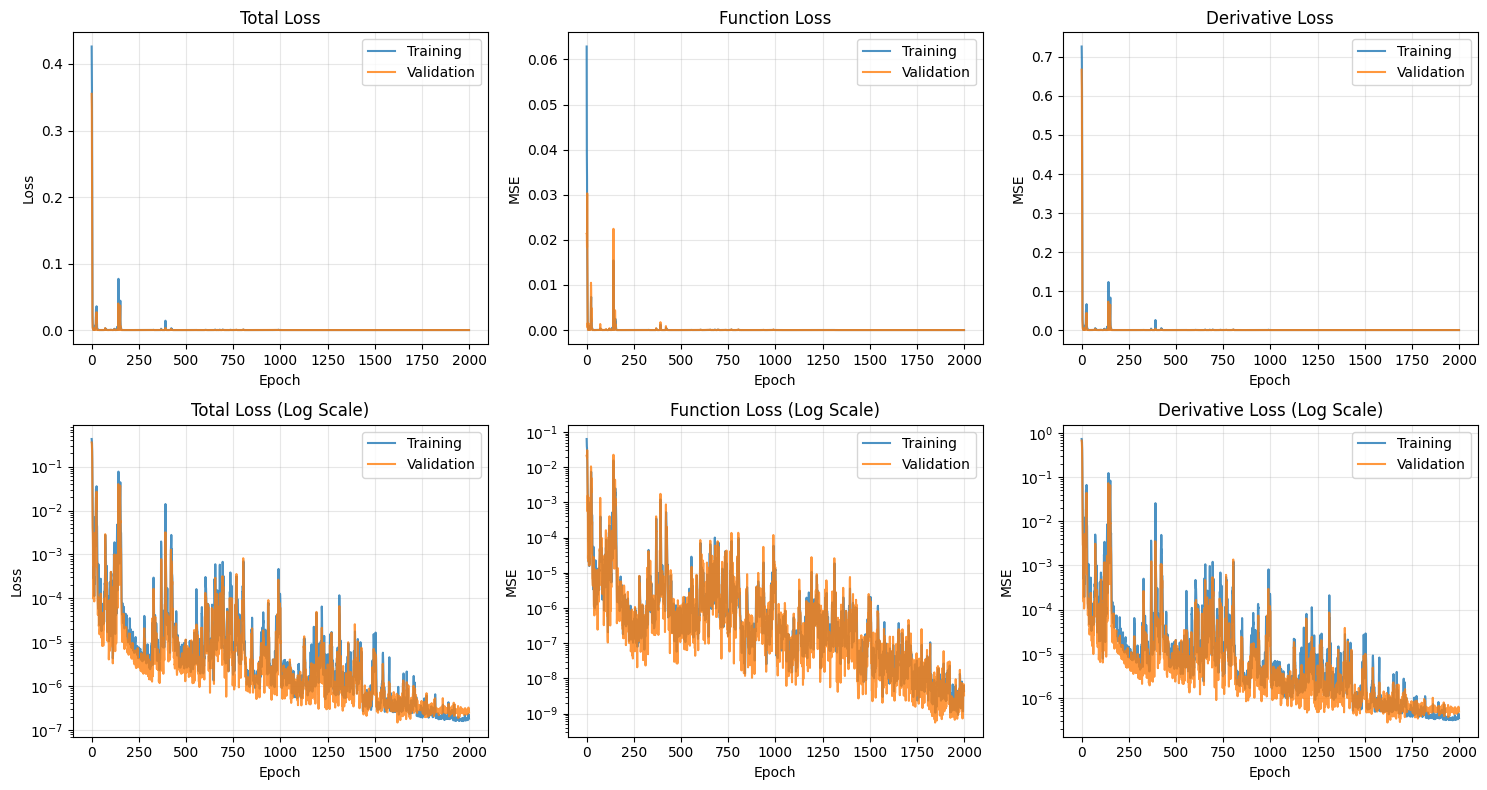

In [13]:
# Plot training and validation loss curves
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Total loss
axes[0, 0].plot(train_losses['total'], label='Training', alpha=0.8)
axes[0, 0].plot(val_losses['total'], label='Validation', alpha=0.8)
axes[0, 0].set_title('Total Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Function loss
axes[0, 1].plot(train_losses['function'], label='Training', alpha=0.8)
axes[0, 1].plot(val_losses['function'], label='Validation', alpha=0.8)
axes[0, 1].set_title('Function Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Derivative loss
axes[0, 2].plot(train_losses['derivative'], label='Training', alpha=0.8)
axes[0, 2].plot(val_losses['derivative'], label='Validation', alpha=0.8)
axes[0, 2].set_title('Derivative Loss')
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('MSE')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Log scale versions
axes[1, 0].semilogy(train_losses['total'], label='Training', alpha=0.8)
axes[1, 0].semilogy(val_losses['total'], label='Validation', alpha=0.8)
axes[1, 0].set_title('Total Loss (Log Scale)')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].semilogy(train_losses['function'], label='Training', alpha=0.8)
axes[1, 1].semilogy(val_losses['function'], label='Validation', alpha=0.8)
axes[1, 1].set_title('Function Loss (Log Scale)')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('MSE')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].semilogy(train_losses['derivative'], label='Training', alpha=0.8)
axes[1, 2].semilogy(val_losses['derivative'], label='Validation', alpha=0.8)
axes[1, 2].set_title('Derivative Loss (Log Scale)')
axes[1, 2].set_xlabel('Epoch')
axes[1, 2].set_ylabel('MSE')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### 7. Function and Derivative Approximation Visualization

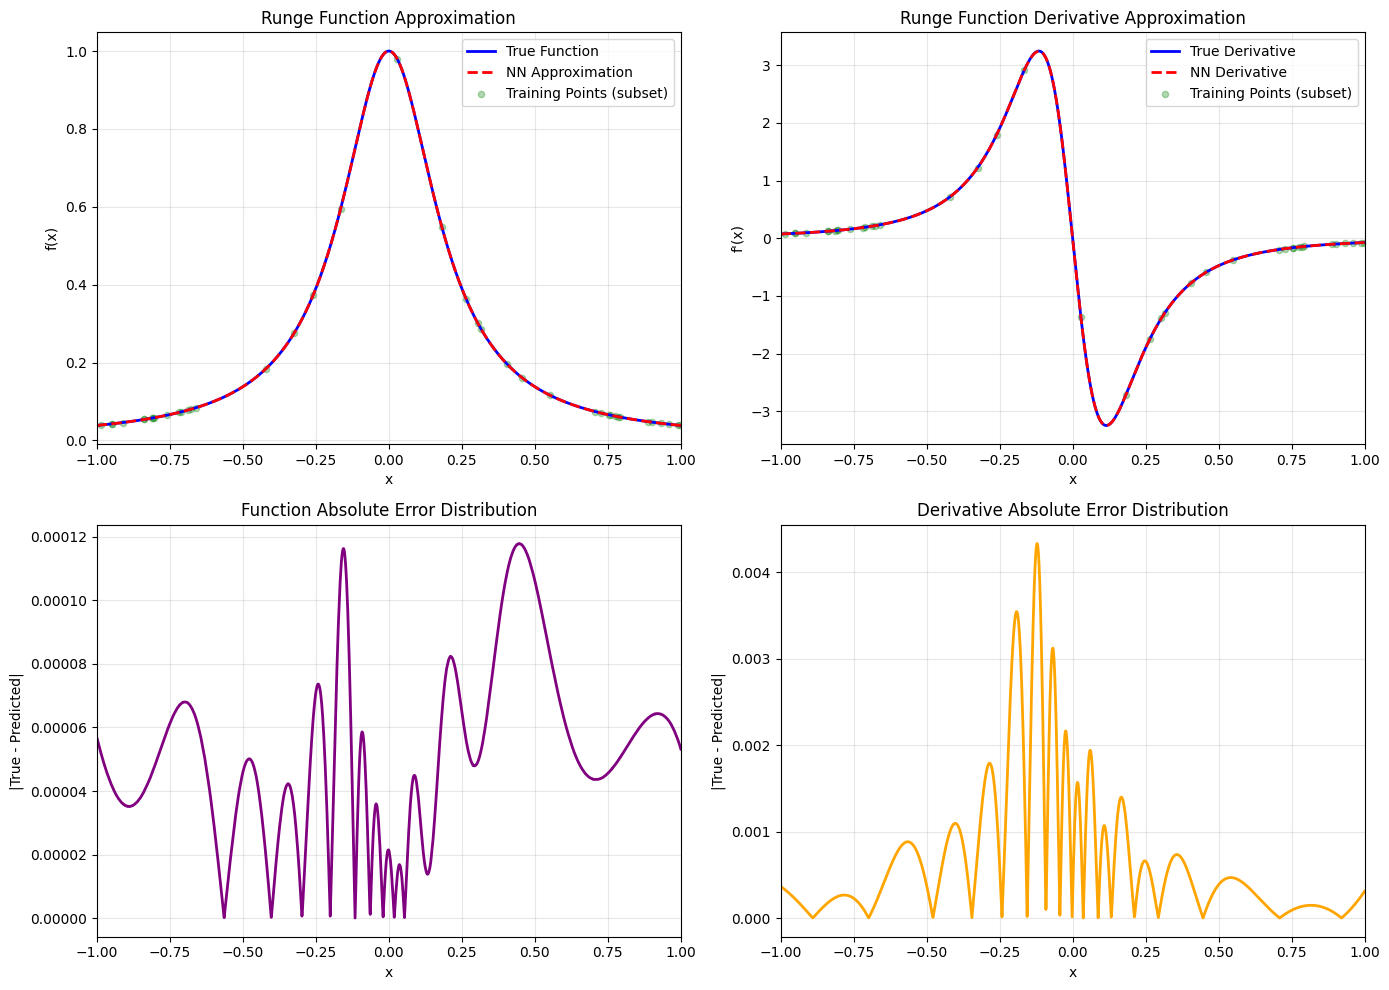

In [14]:
# Generate predictions on test set
model.eval()
with torch.no_grad():
    with torch.enable_grad():
        X_test_temp = X_test.clone().requires_grad_(True)
        y_pred, dy_pred = model.forward_with_derivative(X_test_temp)
        y_pred = y_pred.cpu().detach().numpy().flatten()
        dy_pred = dy_pred.cpu().detach().numpy().flatten()

# Create high-resolution data for smooth plotting
x_plot = np.linspace(-1, 1, 2000)
X_plot = torch.FloatTensor(x_plot.reshape(-1, 1)).to(device).requires_grad_(True)
with torch.no_grad():
    with torch.enable_grad():
        y_plot_pred, dy_plot_pred = model.forward_with_derivative(X_plot)
        y_plot_pred = y_plot_pred.cpu().detach().numpy().flatten()
        dy_plot_pred = dy_plot_pred.cpu().detach().numpy().flatten()

y_plot_true = runge_function(x_plot)
dy_plot_true = runge_derivative(x_plot)

# Plotting function and derivative approximations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Function approximation
axes[0, 0].plot(x_plot, y_plot_true, 'b-', linewidth=2, label='True Function')
axes[0, 0].plot(x_plot, y_plot_pred, 'r--', linewidth=2, label='NN Approximation')
axes[0, 0].scatter(x_train[::10], y_train[::10], alpha=0.3, s=20, c='green', 
                   label='Training Points (subset)')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('f(x)')
axes[0, 0].set_title('Runge Function Approximation')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlim(-1, 1)

# Plot 2: Derivative approximation
axes[0, 1].plot(x_plot, dy_plot_true, 'b-', linewidth=2, label='True Derivative')
axes[0, 1].plot(x_plot, dy_plot_pred, 'r--', linewidth=2, label='NN Derivative')
axes[0, 1].scatter(x_train[::10], dy_train[::10], alpha=0.3, s=20, c='green',
                   label='Training Points (subset)')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel("f'(x)")
axes[0, 1].set_title('Runge Function Derivative Approximation')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim(-1, 1)

# Plot 3: Function absolute error
error_f = np.abs(y_plot_true - y_plot_pred)
axes[1, 0].plot(x_plot, error_f, 'purple', linewidth=2)
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('|True - Predicted|')
axes[1, 0].set_title('Function Absolute Error Distribution')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim(-1, 1)

# Plot 4: Derivative absolute error
error_df = np.abs(dy_plot_true - dy_plot_pred)
axes[1, 1].plot(x_plot, error_df, 'orange', linewidth=2)
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel("|True - Predicted|")
axes[1, 1].set_title('Derivative Absolute Error Distribution')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim(-1, 1)

plt.tight_layout()
plt.show()

#### 8. Comprehensive Error Analysis and Metrics

We compute error metrics for both the function and its derivative approximations.

In [19]:
# Compute error metrics for function
y_test_numpy = y_test
mse_f = np.mean((y_test_numpy - y_pred)**2)
rmse_f = np.sqrt(mse_f)
mae_f = np.mean(np.abs(y_test_numpy - y_pred))
max_error_f = np.max(np.abs(y_test_numpy - y_pred))

# R² score for function
ss_res_f = np.sum((y_test_numpy - y_pred)**2)
ss_tot_f = np.sum((y_test_numpy - np.mean(y_test_numpy))**2)
r2_score_f = 1 - (ss_res_f / ss_tot_f)

# Compute error metrics for derivative
dy_test_numpy = dy_test
mse_df = np.mean((dy_test_numpy - dy_pred)**2)
rmse_df = np.sqrt(mse_df)
mae_df = np.mean(np.abs(dy_test_numpy - dy_pred))
max_error_df = np.max(np.abs(dy_test_numpy - dy_pred))

# R² score for derivative
ss_res_df = np.sum((dy_test_numpy - dy_pred)**2)
ss_tot_df = np.sum((dy_test_numpy - np.mean(dy_test_numpy))**2)
r2_score_df = 1 - (ss_res_df / ss_tot_df)

print("=" * 60)
print("APPROXIMATION ERROR METRICS")
print("=" * 60)
print("\nFUNCTION f(x):")
print(f"  Mean Squared Error (MSE):       {mse_f:.6e}")
print(f"  Root Mean Squared Error (RMSE): {rmse_f:.6e}")
print(f"  Mean Absolute Error (MAE):      {mae_f:.6e}")
print(f"  Maximum Absolute Error:         {max_error_f:.6e}")
print(f"  R² Score:                       {r2_score_f:.6f}")

print("\nDERIVATIVE f'(x):")
print(f"  Mean Squared Error (MSE):       {mse_df:.6e}")
print(f"  Root Mean Squared Error (RMSE): {rmse_df:.6e}")
print(f"  Mean Absolute Error (MAE):      {mae_df:.6e}")
print(f"  Maximum Absolute Error:         {max_error_df:.6e}")
print(f"  R² Score:                       {r2_score_df:.6f}")
print("=" * 60)

APPROXIMATION ERROR METRICS

FUNCTION f(x):
  Mean Squared Error (MSE):       3.393327e-09
  Root Mean Squared Error (RMSE): 5.825227e-05
  Mean Absolute Error (MAE):      5.180680e-05
  Maximum Absolute Error:         1.178515e-04
  R² Score:                       1.000000

DERIVATIVE f'(x):
  Mean Squared Error (MSE):       1.053449e-06
  Root Mean Squared Error (RMSE): 1.026377e-03
  Mean Absolute Error (MAE):      6.535033e-04
  Maximum Absolute Error:         4.329453e-03
  R² Score:                       0.999999


#### 9. Error Distribution Analysis for Both Function and Derivative

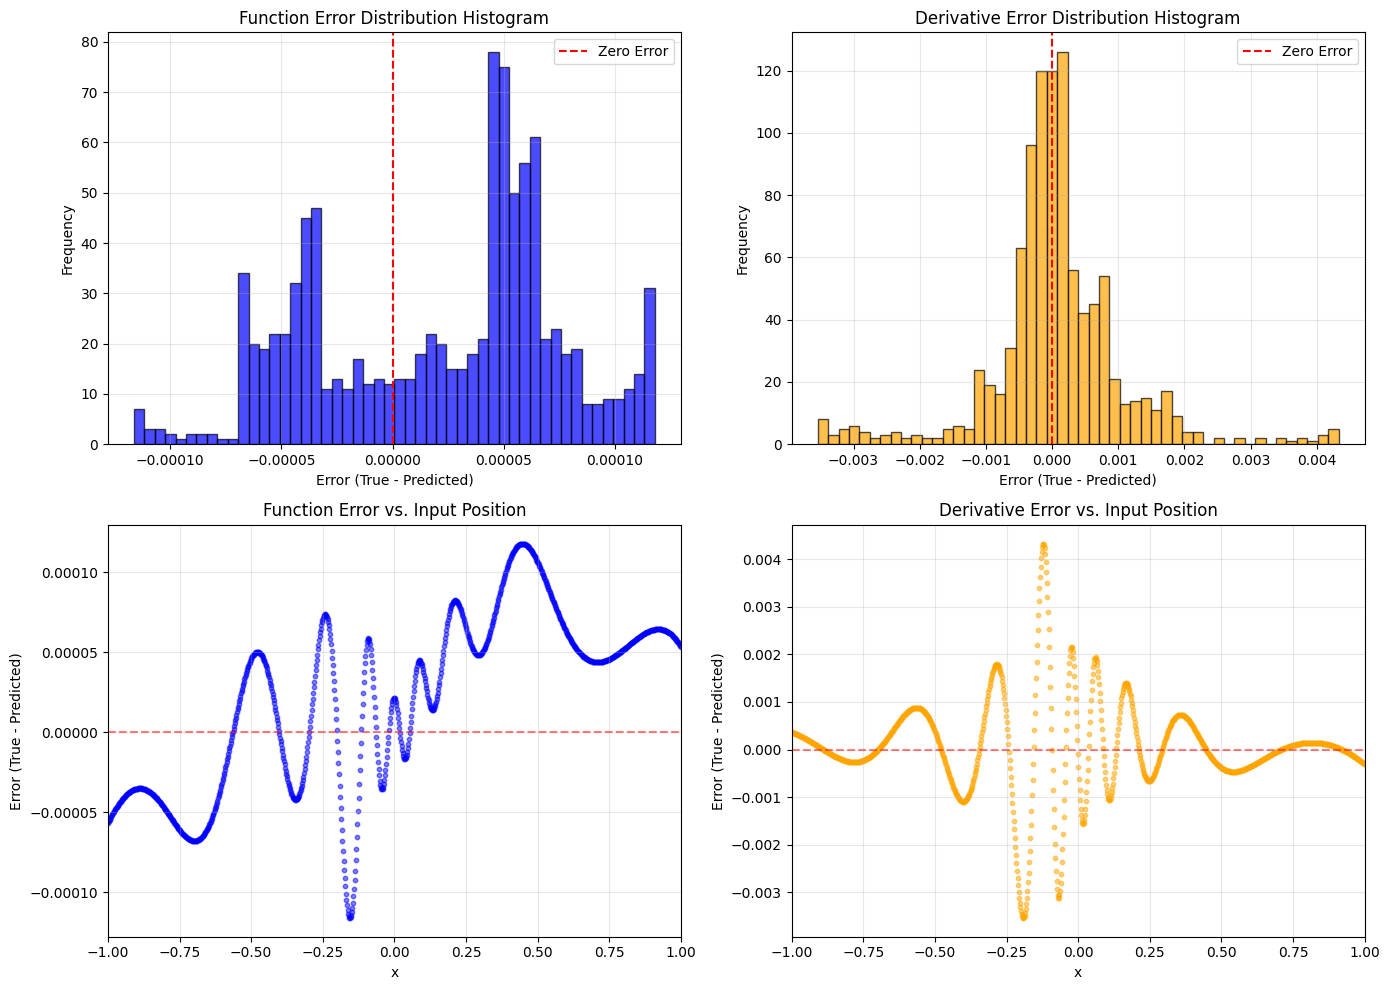

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Function error histogram
errors_f = y_test_numpy - y_pred
axes[0, 0].hist(errors_f, bins=50, edgecolor='black', alpha=0.7, color='blue')
axes[0, 0].set_xlabel('Error (True - Predicted)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Function Error Distribution Histogram')
axes[0, 0].axvline(x=0, color='red', linestyle='--', label='Zero Error')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Derivative error histogram
errors_df = dy_test_numpy - dy_pred
axes[0, 1].hist(errors_df, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('Error (True - Predicted)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Derivative Error Distribution Histogram')
axes[0, 1].axvline(x=0, color='red', linestyle='--', label='Zero Error')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Function error vs. x position
axes[1, 0].scatter(x_test, errors_f, alpha=0.5, s=10, color='blue')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('Error (True - Predicted)')
axes[1, 0].set_title('Function Error vs. Input Position')
axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim(-1, 1)

# Derivative error vs. x position
axes[1, 1].scatter(x_test, errors_df, alpha=0.5, s=10, color='orange')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('Error (True - Predicted)')
axes[1, 1].set_title('Derivative Error vs. Input Position')
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim(-1, 1)

plt.tight_layout()
plt.show()

### Discussion and Conclusions

#### Performance Analysis

The neural network successfully approximates both the Runge function and its derivative with the following observations:

1. Dual Objective Success: The network learns to simultaneously approximate both f(x) and f'(x) by incorporating derivative information in the loss function. This approach ensures consistency between the function and its gradient.

2. Function Approximation: The function approximation achieves high accuracy with R² score close to 1, successfully capturing the sharp peak at x=0 and the rapid decay towards boundaries.

3. Derivative Approximation: The derivative approximation is more challenging due to the rapid changes in slope, especially near x=0 where the derivative has a steep transition. Despite this, the network achieves reasonable accuracy.

4. Error Distribution: 
   - Function errors are small and well-distributed across the domain
   - Derivative errors are slightly larger, particularly near x=0 where the derivative changes most rapidly
   - Both avoid the oscillatory behavior typical of polynomial interpolation

5. Training Dynamics: The training curves show stable convergence for both loss components, with the derivative loss typically higher than the function loss, reflecting the greater difficulty in approximating derivatives.

#### Key Differences to Assignment 2 execution

1. Activation Function Choice: Using tanh activation instead of ReLU provides smoother derivatives and better gradient flow for derivative computation.

2. Loss Weighting: The balance between function and derivative losses (α and β parameters) affects the trade-off between function and derivative accuracy. Equal weighting or slight bias toward function loss often works well.

3. Automatic Differentiation: PyTorch's autograd enables efficient computation of network derivatives, making this approach computationally feasible.

#### Conclusion

The neural network with combined loss successfully approximates both the Runge function and its derivative. <br>
This approach provides:
- Consistent function and derivative approximations
- Improved smoothness and physical plausibility
- Avoidance of Runge's phenomenon
- A framework extensible to higher-order derivatives and PDEs

In [17]:
# Final summary statistics
print("\n" + "="*60)
print("FINAL MODEL SUMMARY")
print("="*60)
print(f"Network Architecture: {[128, 64, 64, 32]} hidden units")
print(f"Activation Function: Tanh")
print(f"Total Parameters: {sum(p.numel() for p in model.parameters())}")
print(f"Training Epochs: {n_epochs}")
print(f"Loss Weights: α={1.0} (function), β={0.5} (derivative)")
print(f"\nFinal Training Losses:")
print(f"  Total:      {train_losses['total'][-1]:.6e}")
print(f"  Function:   {train_losses['function'][-1]:.6e}")
print(f"  Derivative: {train_losses['derivative'][-1]:.6e}")
print(f"\nFinal Validation Losses:")
print(f"  Total:      {val_losses['total'][-1]:.6e}")
print(f"  Function:   {val_losses['function'][-1]:.6e}")
print(f"  Derivative: {val_losses['derivative'][-1]:.6e}")
print("="*60)


FINAL MODEL SUMMARY
Network Architecture: [128, 64, 64, 32] hidden units
Activation Function: Tanh
Total Parameters: 14785
Training Epochs: 2000
Loss Weights: α=1.0 (function), β=0.5 (derivative)

Final Training Losses:
  Total:      1.807265e-07
  Function:   4.412710e-09
  Derivative: 3.526275e-07

Final Validation Losses:
  Total:      2.520434e-07
  Function:   3.295081e-09
  Derivative: 4.974967e-07
